In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../input/train.csv")
train_data = pd.read_csv("../input/train.csv")
test_data = pd.read_csv("../input/test.csv")

In [3]:
df = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

def extract_features(df):
    # 1. FamilySize の作成
    # 課題: SibSp + Parch + 1 (自分) を計算して FamilySize カラムを作成してください
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    
    # 2. 敬称 (Title) の抽出
    # 定石コードを提示します。正規表現で名前から敬称を抜き出します。
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
    # 3. 敬称の統合
    # 課題: 希少な敬称（Dr, Rev, Captなど）を 'Rare' に、
    # 'Mlle' 'Ms' を 'Miss' に、'Mme' を 'Mrs' に置換してください。
    # ヒント: df['Title'].replace(['Mlle','Ms'], 'Miss', inplace=True) などを使用
    df["Title"].replace(["Mlle", "Ms"], "Miss", inplace=True)
    df["Title"].replace("Mme", "Mrs", inplace=True)

    return df

train_data = extract_features(df)
test_data = extract_features(test)

# 結果の確認
# print(train_data[['Title', 'Survived']].groupby(['Title']).mean())

<>:11: SyntaxWarning: invalid escape sequence '\.'
<>:11: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_1067/2823374501.py:11: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
/tmp/ipykernel_1067/2823374501.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Title"].replace(["Mlle", "Ms"], "Miss", inplace=True)
/tmp/ipykernel_1067/2823374501.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained ass

In [4]:
# 1. 敬称・客室クラスごとの年齢中央値を算出
# 課題: train_data を Title と Pclass でグループ化し、Age の中央値を算出してください。
# ヒント: df.groupby(['Title', 'Pclass'])['Age'].transform('median')

df.groupby(["Title", "Pclass"])["Age"].transform("median")


0      26.0
1      40.0
2      18.0
3      40.0
4      26.0
       ... 
886    46.5
887    30.0
888    18.0
889    40.0
890    26.0
Name: Age, Length: 891, dtype: float64

In [5]:
# 2. 欠損値の穴埋め
train_data['Age'] = train_data['Age'].fillna(
    train_data.groupby(['Title', 'Pclass'])['Age'].transform('median')
)
test_data['Age'] = test_data['Age'].fillna(
    test_data.groupby(['Title', 'Pclass'])['Age'].transform('median')
)



In [6]:
# 3. 年齢のビン化（子供フラグ）
# 補完後に、あなたが提案した「10歳以下か否か」のフラグを立てるのは有効な戦略です。
train_data['IsChild'] = (train_data['Age'] <= 10).astype(int)
test_data['IsChild'] = (test_data['Age'] <= 10).astype(int)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 1. 特徴量の選択（数値変数とカテゴリ変数）
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Title", "FamilySize", "IsChild"]

# 2. カテゴリ変数の One-Hot Encoding
# 課題: pd.get_dummies を使い、train_data[features] を数値化してください。
X = pd.get_dummies(train_data[features])
y = train_data["Survived"]
# print(f"traindata: {train_data}")

# 3. Random Forest の設定
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

# 4. K-Fold Cross Validation の実行
# 課題: cross_val_score を使い、5-fold CV で精度（accuracy）を計算してください。
# ヒント: scores = cross_val_score(model, X, y, cv=5)
scores = cross_val_score(model, X, y, cv=5)

print(f"CV Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f}")

CV Scores: [0.83798883 0.8258427  0.8258427  0.80337079 0.85393258]
Mean Accuracy: 0.8294


([<matplotlib.axis.YTick at 0x77365f5cc500>,
 [Text(0, 0, 'Pclass'),
  Text(0, 1, 'Age'),
  Text(0, 2, 'SibSp'),
  Text(0, 3, 'Parch'),
  Text(0, 4, 'Fare'),
  Text(0, 5, 'FamilySize'),
  Text(0, 6, 'IsChild'),
  Text(0, 7, 'Sex_female'),
  Text(0, 8, 'Sex_male'),
  Text(0, 9, 'Embarked_C'),
  Text(0, 10, 'Embarked_Q'),
  Text(0, 11, 'Embarked_S'),
  Text(0, 12, 'Title_Capt'),
  Text(0, 13, 'Title_Col'),
  Text(0, 14, 'Title_Countess'),
  Text(0, 15, 'Title_Don'),
  Text(0, 16, 'Title_Dr'),
  Text(0, 17, 'Title_Jonkheer'),
  Text(0, 18, 'Title_Lady'),
  Text(0, 19, 'Title_Major'),
  Text(0, 20, 'Title_Master'),
  Text(0, 21, 'Title_Miss'),
  Text(0, 22, 'Title_Mr'),
  Text(0, 23, 'Title_Mrs'),
  Text(0, 24, 'Title_Rev'),
  Text(0, 25, 'Title_Sir')])

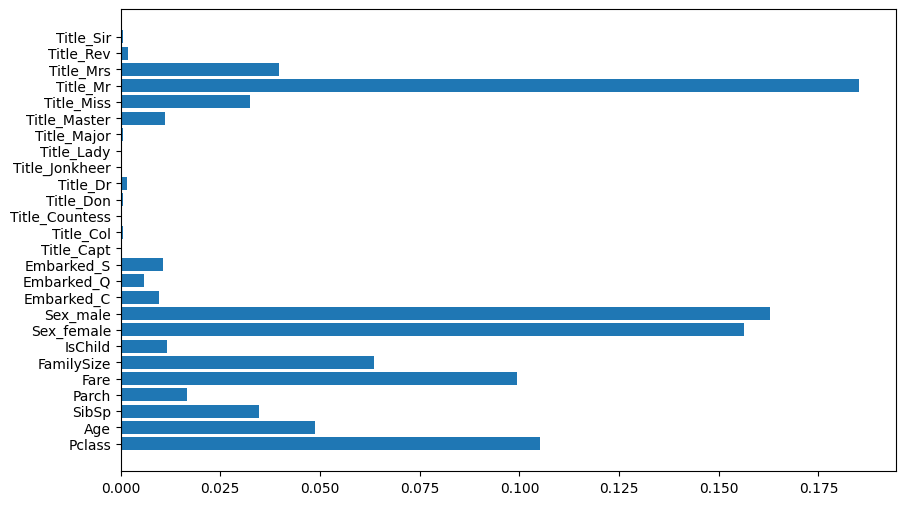

In [9]:
import matplotlib.pyplot as plot

model.fit(X, y)
importances = model.feature_importances_
labels = X.columns

plt.figure(figsize = (10,6))
plt.barh(y = range(len(importances)), width = importances)
plt.yticks(ticks = range(len(labels)), labels = labels)


In [12]:
from sklearn.model_selection import GridSearchCV

# チューニング対象のパラメータ
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [1, 3, 5]
}

# 1. GridSearchCV の実装
# 課題: model, param_grid, cv=5 を指定して GridSearchCV を作成し、fit させてください。
# ヒント: grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring="accuracy")
grid_search.fit(X,y)

# 2. 最良スコアの確認
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 5, 'min_samples_leaf': 3, 'n_estimators': 300}
0.8327537505492437


In [13]:
# 最適なパラメータでモデルを再定義
final_model = RandomForestClassifier(
    n_estimators=300, 
    max_depth=5, 
    min_samples_leaf=3, 
    random_state=1
)

# 1. 全訓練データで再学習
# 課題: X, y を使い、final_model を学習させてください。
final_model.fit(X, y)

# 2. テストデータに対する予測
# 課題: test_data を数値化した X_test を使い、予測を行ってください。
X_test = pd.get_dummies(test_data[features])
# カテゴリ変数の整合性を確認（trainにはあったがtestにはないTitle等への対処）
X_test = X_test.reindex(columns=X.columns, fill_value=0)
predictions = final_model.predict(X_test)

# 3. 提出用 CSV の作成
# 課題: PassengerId と Survived の2カラムを持つ DataFrame を作成し保存してください。
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": predictions
})
submission.to_csv("submission.csv", index=False)
print("Submission file created.")

Submission file created.
